## Prediktiv Analyse

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('komplett_data_med_utfylte_mengder.csv',parse_dates=['datetime'])

df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["week"] = df["datetime"].dt.isocalendar().week
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year


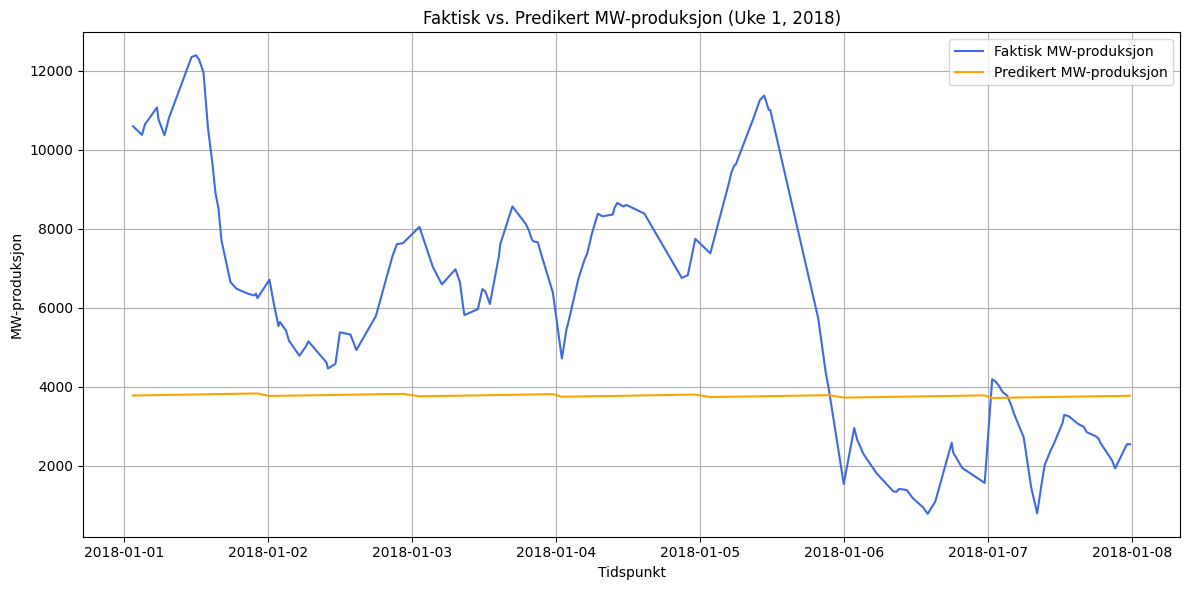

In [19]:
# --- Funksjoner fra tidspunkt ---
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["week"] = df["datetime"].dt.isocalendar().week
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

# --- Tren/test-splitt med datetime inkludert ---
df["datetime_col"] = df["datetime"]  # kopier så datetime ikke kuttes

X = df[["hour", "day", "week", "month", "year", "datetime_col"]]
y = df["MW"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Tren modellen ---
modell = LinearRegression()
modell.fit(X_train.drop(columns=["datetime_col"]), y_train)

# --- Lag resultat-tabell ---
resultater = X_test[["datetime_col"]].copy()
resultater["Faktisk MW"] = y_test.values
resultater["Predikert MW"] = modell.predict(X_test.drop(columns=["datetime_col"]))
resultater = resultater.sort_values("datetime_col")

# --- Valgfritt: Zoom inn på en uke for bedre synlighet ---
resultater_zoom = resultater[resultater["datetime_col"].between("2018-01-01", "2018-01-08")]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(resultater_zoom["datetime_col"], resultater_zoom["Faktisk MW"], label="Faktisk MW-produksjon", color="royalblue")
plt.plot(resultater_zoom["datetime_col"], resultater_zoom["Predikert MW"], label="Predikert MW-produksjon", color="orange")

plt.xlabel("Tidspunkt")
plt.ylabel("MW-produksjon")
plt.title("Faktisk vs. Predikert MW-produksjon (Uke 1, 2018)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

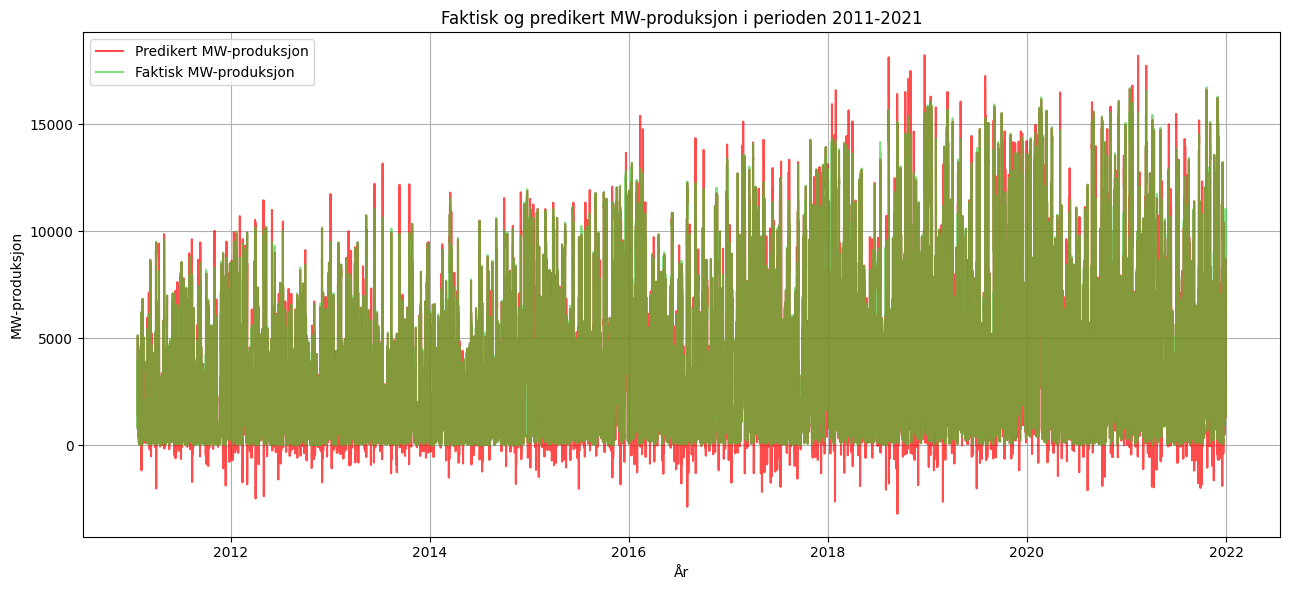

MSE: 106,632
R²: 0.9885


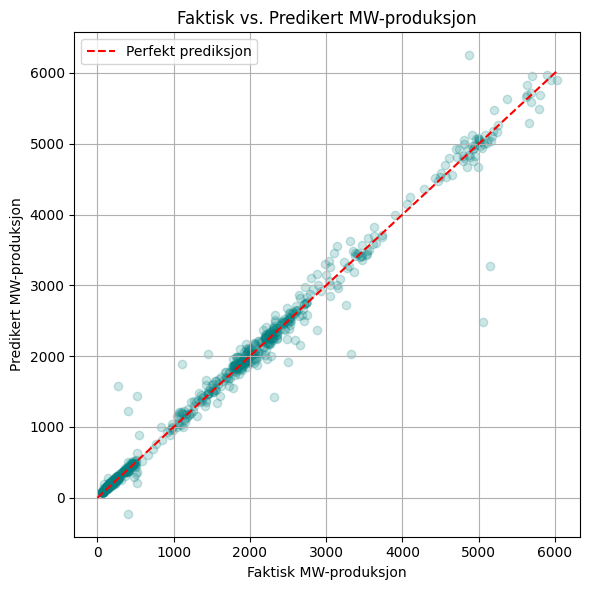

In [44]:

# 4. Lag lags og glidende gjennomsnitt
df["MW_lag_1"] = df["MW"].shift(1)
df["MW_lag_4"] = df["MW"].shift(4)
df["MW_rolling_4"] = df["MW"].rolling(window=4).mean()
df["MW_rolling_96"] = df["MW"].rolling(window=96).mean()

# 5. Fjern rader med NaN
df.dropna(inplace=True)

# 6. Feature matrix og target
X = df[["hour", "day", "month", "MW_lag_1", "MW_lag_4", "MW_rolling_4", "MW_rolling_96"]]
y = df["MW"]

# 7. Tren modellen på hele datasettet
model = LinearRegression()
model.fit(X, y)

# 8. Prediker på hele datasettet
df["MW_pred"] = model.predict(X)

# 9. Visualisering av faktisk og predikert MW
plt.figure(figsize=(13, 6))
plt.plot(df["datetime"], df["MW_pred"], label="Predikert MW-produksjon", color="red", alpha=0.7)
plt.plot(df["datetime"], df["MW"], label="Faktisk MW-produksjon", color="limegreen", alpha=0.6)
plt.title("Faktisk og predikert MW-produksjon i perioden 2011-2021")
plt.xlabel("År")
plt.ylabel("MW-produksjon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Evaluer ytelsen
mse = mean_squared_error(df["MW"], df["MW_pred"])
r2 = r2_score(df["MW"], df["MW_pred"])
print(f"MSE: {mse:,.0f}")
print(f"R²: {r2:.4f}")



# Scatterplot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='Perfekt prediksjon')
plt.xlabel("Faktisk MW-produksjon")
plt.ylabel("Predikert MW-produksjon")
plt.title("Faktisk vs. Predikert MW-produksjon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



